# K-means clustering

### Algorithm:
1. Initialize centers {$\mu_k$} to some values
2. Assuming current value of {$\mu_k$} fixed, minimize $J$ over {$r_{nk}$}, which leads to the following cluster assignment rule:
\begin{equation*}
    r_{nk}= 
\begin{cases}
    1, & \text{if } k= \text{arg min}_j ||\mathbf{x}_n- \mu_j||^2_2\\        
    0, & \text{otherwise}
\end{cases}
\end{equation*}
where $J$ is the clustering objective function:
\begin{equation*}
J= \sum_n \sum_k r_{nk}||\mathbf{x}_n - \mu_k||^2_2
\end{equation*}
3. Assume current value of {$r_{nk}$} fixed, minimize $J$ over {$\mu_k$}, which leads to the following rule to update the the cluster centers:
\begin{equation*}
\mu_k = \frac{\sum_n r_{nk}\mathbf{x}_n}{\sum_n r_{nk}}
\end{equation*}

Repeat steps 2 & 3 until convergence.

In [4]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Importing blob data

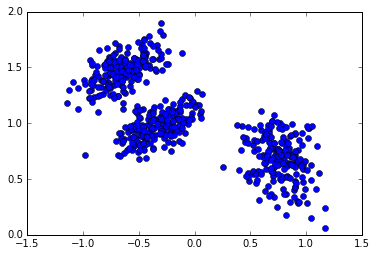

In [28]:
colNames=["x", "y"]
blobData= pd.read_csv('data\hw5_blob.csv', header=None, names= colNames)

plt.plot(blobData.x, blobData.y, 'bo')

## Choose # centers

In [6]:
k=5

## Step 1: Initialize centers randomly

In [7]:
centerIDs=np.random.choice(blobData.shape[0], k, replace=False)

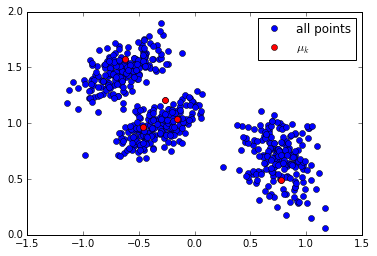

In [21]:
plt.plot(blobData.x, blobData.y, 'bo', blobData.loc[centerIDs, 'x'],  blobData.loc[centerIDs, 'y'], 'ro')
plt.legend(['all points', '$\mu_k$'], numpoints=1)

In [9]:
kCenters=blobData.loc[centerIDs].reset_index(drop=True)

dColNames= []
for i in range(k):
    dColNames.append('C'+ str(i)+'-dist')

colors= ['b', 'g', 'c', 'm', 'y']

## Steps 2 & 3

Below cell has to be rerun manually until convergence.

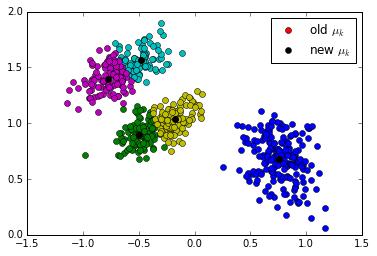

In [25]:
#Step 2: Update r_nk
for i in range(k):
    blobData[dColNames[i]]= (blobData.x- kCenters.loc[i, 'x'])**2 + (blobData.y- kCenters.loc[i, 'y'])**2

blobData['minDist']=blobData[dColNames].min(axis=1)

for i in range(k):
    blobData.loc[blobData[dColNames[i]]==blobData['minDist'],'label']=i

#Step 3: Update centers, u_k
newkCenters= blobData.groupby('label')[['x', 'y']].mean()

newkCenters.reset_index(drop=True)

# Plot updated centers
plt.figure(1)

for i in range(k):
    plt.plot(blobData[blobData['label']==i].x, blobData[blobData['label']==i].y, color=colors[i], linestyle='', marker='o', label='_nolegend_') 
    
plt.plot(kCenters.x,  kCenters.y, 'ro', label='old $\mu_k$')
plt.plot(newkCenters.x, newkCenters.y, 'ko', label='new $\mu_k$')

plt.legend(numpoints=1)

kCenters= newkCenters